In [7]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import random
from scipy import optimize

Part I

In [2]:
# Functions

func1 = lambda x: x**3
func2 = lambda x: np.abs(x - 0.2)
func3 = lambda x: x * np.sin(1/x)

funcs = [func1, func2, func3]

In [3]:
eps = 0.001

In [5]:
# One-dimensional direct methods

def exhaustive_search(f, a, b, eps=eps):
    n = (b - a) / eps
    x_k = np.arange(a, b, (b-a)/n)
    x_m = x_k[np.argmin(f(x_k))]
    return x_m, len(f(x_k)), len(f(x_k))

delta = np.random.uniform(0, eps)
def dichotomy(f, a, b, delta = delta, eps=eps):
    
    iter = 0
    while np.abs(a - b) >= eps:
      x1 = (a + b - delta)/2
      x2 = (a + b + delta)/2
      if f(x1) <= f(x2):
        b = x2
      else:
        a = x1
      iter += 1
    return (a, b), iter*2, iter

def golden_section(f, a, b, eps=eps):
    x1 = a + (3 - 5**0.5)*(b - a)/2
    x2 = b + (5**0.5 - 3)*(b - a)/2
    i = 0
    f1 = f(x1)
    f2 = f(x2)
    while np.abs(a - b) >= eps:
        if f(x1) <= f(x2):
            b = x2
            x2 = x1
            x1 = a + (3 - np.sqrt(5))/2*(b - a)
            f2 = f1
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            x2 = b + (np.sqrt(5) - 3)/2*(b - a)
            f1 = f2
            f2 = f(x2)
        i += 1
    return (a, b), i + 2, i

In [15]:
# 1
print('Exhaustive search results:')
print(' Function 1')
print('   x_min = ', exhaustive_search(func1, 0, 1)[0])
print('   Number of f-calculations = ', exhaustive_search(func1, 0, 1)[1])
print('   Number of iterations = ', exhaustive_search(func1, 0, 1)[2])
print(' Function 2')
print('   x_min = ', exhaustive_search(func2, 0, 1)[0])
print('   Number of f-calculations = ', exhaustive_search(func2, 0, 1)[1])
print('   Number of iterations = ', exhaustive_search(func2, 0, 1)[2])
print(' Function 3')
print('   x_min = ', exhaustive_search(func3, 0.01, 1)[0])
print('   Number of f-calculations = ', exhaustive_search(func3, 0.01, 1)[1])
print('   Number of iterations = ', exhaustive_search(func3, 0.01, 1)[2])

Exhaustive search results:
 Function 1
   x_min =  0.0
   Number of f-calculations =  1000
   Number of iterations =  1000
 Function 2
   x_min =  0.2
   Number of f-calculations =  1000
   Number of iterations =  1000
 Function 3
   x_min =  0.22299999999999984
   Number of f-calculations =  990
   Number of iterations =  990


In [16]:
# 2

print('Dichotomy method results:')
print(' Function 1')
print('   x_min section is ', dichotomy(func1, 0, 1)[0])
print('   Number of f-calculations = ', dichotomy(func1, 0, 1)[1])
print('   Number of iterations = ', dichotomy(func1, 0, 1)[2])
print(' Function 2')
print('   x_min section is  ', dichotomy(func2, 0, 1)[0])
print('   Number of f-calculations = ', dichotomy(func2, 0, 1)[1])
print('   Number of iterations = ', dichotomy(func2, 0, 1)[2])
print(' Function 3')
print('   x_min section is  ', dichotomy(func3, 0.01, 1)[0])
print('   Number of f-calculations = ', dichotomy(func3, 0.01, 1)[1])
print('   Number of iterations = ', dichotomy(func3, 0.01, 1)[2])

Dichotomy method results:
 Function 1
   x_min section is  (0, 0.0009349087389926897)
   Number of f-calculations =  24
   Number of iterations =  12
 Function 2
   x_min section is   (0.19956904631294362, 0.2005039550519363)
   Number of f-calculations =  24
   Number of iterations =  12
 Function 3
   x_min section is   (0.2220638079809162, 0.2229962753136589)
   Number of f-calculations =  24
   Number of iterations =  12


In [17]:
# 3
print('Golden section results:')
print(' Function 1')
print('   x_min section is ', golden_section(func1, 0, 1)[0])
print('   Number of f-calculations = ', golden_section(func1, 0, 1)[1])
print('   Number of iterations = ', golden_section(func1, 0, 1)[2])
print(' Function 2')
print('   x_min section is  ', golden_section(func2, 0, 1)[0])
print('   Number of f-calculations = ', golden_section(func2, 0, 1)[1])
print('   Number of iterations = ', golden_section(func2, 0, 1)[2])
print(' Function 3')
print('   x_min section is  ', golden_section(func3, 0.01, 1)[0])
print('   Number of f-calculations = ', golden_section(func3, 0.01, 1)[1])
print('   Number of iterations = ', golden_section(func3, 0.01, 1)[2])

Golden section results:
 Function 1
   x_min section is  (0, 0.000733137435857404)
   Number of f-calculations =  17
   Number of iterations =  15
 Function 2
   x_min section is   (0.199706745025657, 0.2004398824615144)
   Number of f-calculations =  17
   Number of iterations =  15
 Function 3
   x_min section is   (0.22235669058885382, 0.22308249665035265)
   Number of f-calculations =  17
   Number of iterations =  15


Part II

In [22]:
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

# Generating the noisy data

X = np.arange(0, 1.01, 0.01) 

def y(x):
  return alpha*x + beta + np.random.normal(0, 1)

Y = np.array([y(x) for x in X])

In [4]:
# Functions for approximation

def F_linear(x, a, b):
    return a*x + b

def F_rational(x, a, b):
    return a/(1 + b*x)

def D(func, X, Y, a, b):
    return sum([(func(x_i, a, b) - y_i)**2 for x_i, y_i in zip(X, Y)])

eps = 0.001

In [8]:
# Exhaustive search

def exhaustive_multidim(f, X, Y, a, b):
    f_min = D(f, X, Y, a, b)
    a_opt = 0
    b_opt = 0
    i = 0
    options = np.arange(-1, 1 + eps, eps)
    for a, b in list(itertools.product(options, repeat=2)):
        new_f = D(f, X, Y, a, b)
        if new_f < f_min:
            f_min = new_f
            a_opt = a
            b_opt = b
        i += 1
    return a_opt, b_opt, i+1, i

In [28]:
# Linear function approximation
%%time
F_linear_opt_1 = exhaustive_multidim(F_linear, X, Y, alpha, beta)
F_linear_opt_1

CPU times: user 7min 24s, sys: 1.02 s, total: 7min 25s
Wall time: 7min 28s


In [33]:
print('Optimal linear function 1: {}x + {}'.format(round(F_linear_opt_1[0], 2), round(F_linear_opt_1[1], 2)))
print('Number of iterations: {}'.format(F_linear_opt_1[2]))
print('Number of function evaluations: {}'.format(F_linear_opt_1[3]))

Optimal linear function 1: 1.0x + 0.82
Number of iterations: 4004002
Number of function evaluations: 4004001


In [30]:
# Rational function approximation
%%time
F_rational_opt_1 = exhaustive_multidim(F_rational, X, Y, alpha, beta)
F_rational_opt_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


CPU times: user 9min 19s, sys: 1.12 s, total: 9min 21s
Wall time: 9min 21s


In [31]:
print('Optimal rational function 1: {}/(1{}x)'.format(round(F_rational_opt_1[0], 2), round(F_rational_opt_1[1], 2)))
print('Number of iterations: {}'.format(F_rational_opt_1[2]))
print('Number of function evaluations: {}'.format(F_rational_opt_1[3]))

Optimal rational function 1: 0.92/(1-0.54x)
Number of iterations: 4004002
Number of function evaluations: 4004001


In [97]:
# Gauss
eps = 0.001

def dichotomy_for_D(f, X, Y, a, b, a_opt, b_opt, par = 'a'):
    i = 0
    delta = np.random.uniform(0, eps)
    
    while np.abs(a - b) > eps:
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        f_1 = D(f, X, Y, x1, b_opt) if par == 'a' else D(f, X, Y, a_opt, x1)
        f_2 = D(f, X, Y, x2, b_opt) if par == 'a' else D(f, X, Y, a_opt, x2)
        
        if f_1 <= f_2:
            b = x2
            fmin = f_1
        else:
            a = x1
            fmin = f_2
        i += 1
    return x1, i*2, i

def gauss(f, X, Y, z1 = 0, z2 = 0):
    f_min_prev = D(f, X, Y, z1, z2)
    z1_prev = z1
    z1 =  dichotomy_for_D(f, X, Y, -1, 1 + eps, z1, z2)[0]
    f_min = D(f, X, Y, z1, z2)
    i = 1 + dichotomy_for_D(f, X, Y, -1, 1 + eps, z1, z2)[2]
    j = 2 + dichotomy_for_D(f, X, Y, -1, 1 + eps, z1, z2)[1]
    l = 1
    while (np.abs(f_min - f_min_prev) >= eps) and (np.abs(z1 - z1_prev) >= eps):
      if l % 2 == 0:
          z1_prev = z1
          z1 =  dichotomy_for_D(f, X, Y, -1, 1 + eps, z1, z2)[0]
          f_min_prev = f_min
          f_min = D(f, X, Y, z1, z2)
          i += 1 + dichotomy_for_D(f, X, Y, -1, 1 + eps, z1, z2)[2]
          j += 1 + dichotomy_for_D(f, X, Y, -1, 1 + eps, z1, z2)[1]
      else:
          z2_prev = z2
          z2 =  dichotomy_for_D(f, X, Y, -1, 1 + eps, z1, z2, par = 'b')[0]
          f_min_prev = f_min
          f_min = D(f, X, Y, z1, z2)
          i += 1 + dichotomy_for_D(f, X, Y, -1, 1 + eps, z1, z2, par = 'b')[2]
          j += 1 + dichotomy_for_D(f, X, Y, -1, 1 + eps, z1, z2, par = 'b')[1]
          if np.abs(z2 - z2_prev) < eps:
              break
      l += 1
    return z1, z2, j, i


In [98]:
%%time
F_linear_opt_2 = gauss(F_linear, X, Y, alpha, beta)

CPU times: user 214 ms, sys: 0 ns, total: 214 ms
Wall time: 218 ms


In [105]:
print('Optimal linear function 2: {}x + {}'.format(round(F_linear_opt_2[0], 2), round(F_linear_opt_2[1], 2)))
print('Number of iterations: {}'.format(F_linear_opt_2[3]))
print('Number of function evaluations: {}'.format(F_linear_opt_2[2]))

Optimal linear function 2: 0.8x + 0.28
Number of iterations: 323
Number of function evaluations: 579


In [100]:
%%time
F_rational_opt_2 = gauss(F_rational, X, Y, alpha, beta)

CPU times: user 328 ms, sys: 0 ns, total: 328 ms
Wall time: 334 ms


In [104]:
print('Optimal rational function 2: {}/(1{}x)'.format(round(F_rational_opt_2[0], 2), round(F_rational_opt_2[1], 2)))
print('Number of iterations: {}'.format(F_rational_opt_2[3]))
print('Number of function evaluations: {}'.format(F_rational_opt_2[2]))

Optimal rational function 2: 0.4/(1-0.7x)
Number of iterations: 414
Number of function evaluations: 723


In [25]:
# Nelder-Mead

# k = np.array(list(range(0, 101)))
# X = np.array(list(map(lambda x: x/100, k)))
# Y = np.array([alpha*x + beta + np.random.normal(0, 1) 
#                for i, x in enumerate(X)])

def F_linear_point(x, point):
    return point[0]*x + point[1]

def F_rational_point(x, point):
    return point[0]/(1 + point[1]*x)

def D_point(point, f, X, Y):
    return sum([(f(x_i, point) - y_i)**2 for x_i, y_i in zip(X, Y)])


def nelder_mead(f, X, Y):
    result = optimize.minimize(D_point, np.random.rand(2), args=(f, X, Y), method ='nelder-mead')
    return result.x
    '''
    i = 0
    a = np.array([np.random.uniform(-1, eps), np.random.uniform(-1, eps), np.random.uniform(-1, eps)])
    b = np.array([np.random.uniform(-1, eps), np.random.uniform(-1, eps), np.random.uniform(-1, eps)])
    while True:
        f =np.array([D(f, X, Y, a[0], b[0]), D(f, X, Y, a[1], b[1]), D(f, X, Y, a[2], b[2])])
        f_l, f_g, f_h  = np.sort(f)[0], np.sort(f)[1], np.sort(f)[2]
        h, g, l = np.where(np.isclose(f, f_h)), np.where(np.isclose(f, f_g)), np.where(np.isclose(f, f_l))
        x_h = (a[h], b[h])
        x_c = ((a[g]+ a[l])/2, (b[g] + b[l])/2)
        x_r = (1 + alpha)*x_c - alpha*(a[h], b[h])
        f_r = D(f, X, Y, x_r[0], x_r[1])
        if f_r < f[2]:
            x_e = (1 - gamma)*x_c + gamma*x_r
            f_e = D(f, X, Y, x_e[0], x_e[1])
            if f_e < f_r:
                x_h = x_e
            else:
                x_h = x_r
        elif f[l] < f_r and f_r < f[g]:
            x_h = x_r
        elif f[g] < f_r and f_r < f[h]:
            x, y = x_r, f_r
            x_r, f_r = x_h, f[h]
            x_h, f[h] = x, y
        
        x_s = beta*x_h + (1 - beta)*x_c
        f_s = D(f, X, Y, x_s[0], x_s[1])
        if f_s < f[h]:
            x_h = x_s
    '''
        




In [26]:
%%time
F_linear_opt_3 = nelder_mead(F_linear_point, X, Y)

CPU times: user 27.1 ms, sys: 724 µs, total: 27.8 ms
Wall time: 29.1 ms


In [28]:
print('Optimal linear function 3: {}x + {}'.format(round(F_linear_opt_3[0], 2), round(F_linear_opt_3[1], 2)))

Optimal linear function 3: 0.21x + 0.12


In [29]:
%%time
F_rational_opt_3 = nelder_mead(F_rational_point, X, Y)

CPU times: user 38.7 ms, sys: 0 ns, total: 38.7 ms
Wall time: 73.9 ms


In [30]:
print('Optimal rational function 3: {}/(1{}x)'.format(round(F_rational_opt_3[0], 2), round(F_rational_opt_3[1], 2)))


Optimal rational function 3: 0.09/(1-0.89x)


Plots

Text(0.5, 1.0, 'Exhaustive search rational approximation')

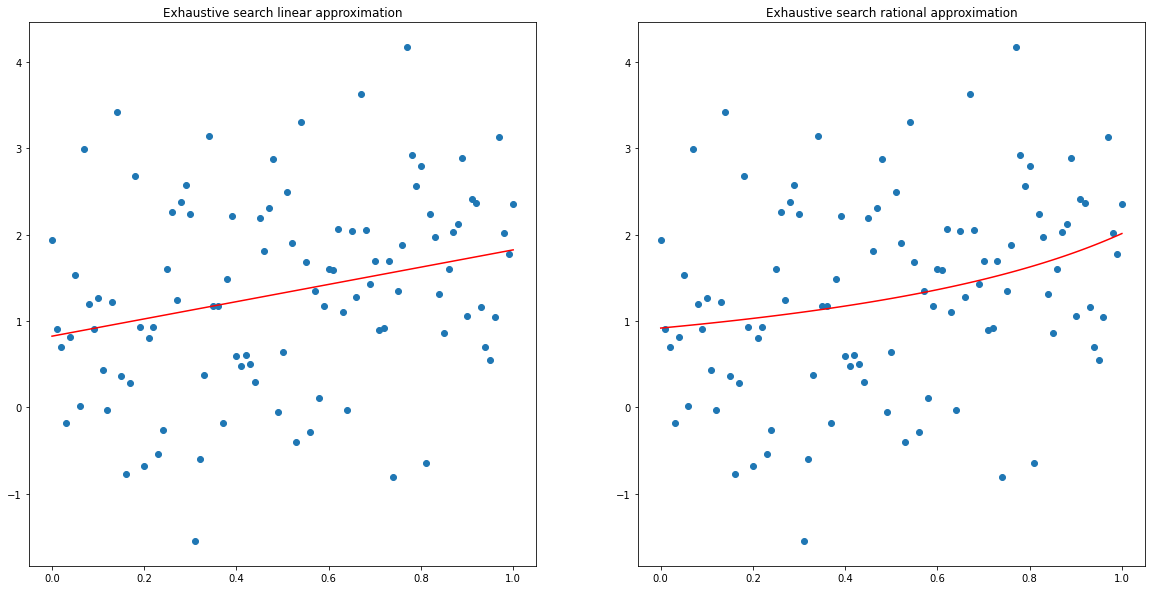

In [36]:
# Exhaustive search

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes.flat[0].plot(X, F_linear(X, F_linear_opt_1[0], F_linear_opt_1[1]), color = 'red')
axes.flat[0].scatter(X, Y)
axes.flat[0].set_title('Exhaustive search linear approximation')


axes.flat[1].plot(X, F_rational(X, F_rational_opt_1[0], F_rational_opt_1[1]), color = 'red')
axes.flat[1].scatter(X, Y)
axes.flat[1].set_title('Exhaustive search rational approximation')

Text(0.5, 1.0, 'Gauss method rational approximation')

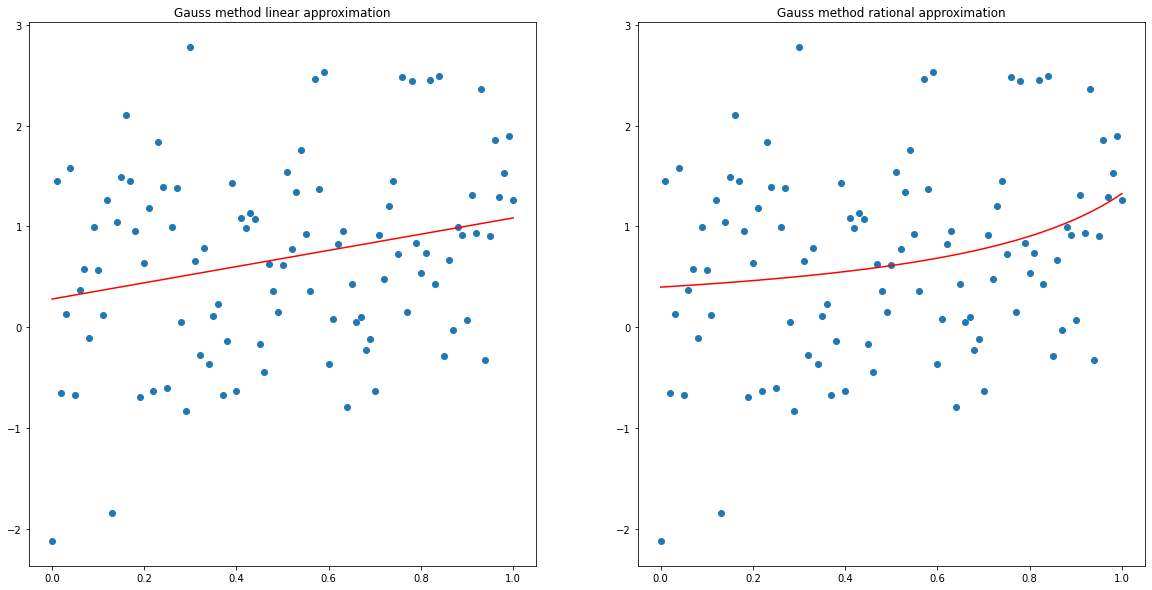

In [106]:
# Gauss method

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes.flat[0].plot(X, F_linear(X, F_linear_opt_2[0], F_linear_opt_2[1]), color = 'red')
axes.flat[0].scatter(X, Y)
axes.flat[0].set_title('Gauss method linear approximation')


axes.flat[1].plot(X, F_rational(X, F_rational_opt_2[0], F_rational_opt_2[1]), color = 'red')
axes.flat[1].scatter(X, Y)
axes.flat[1].set_title('Gauss method rational approximation')

Text(0.5, 1.0, 'Nelder-Mead method rational approximation')

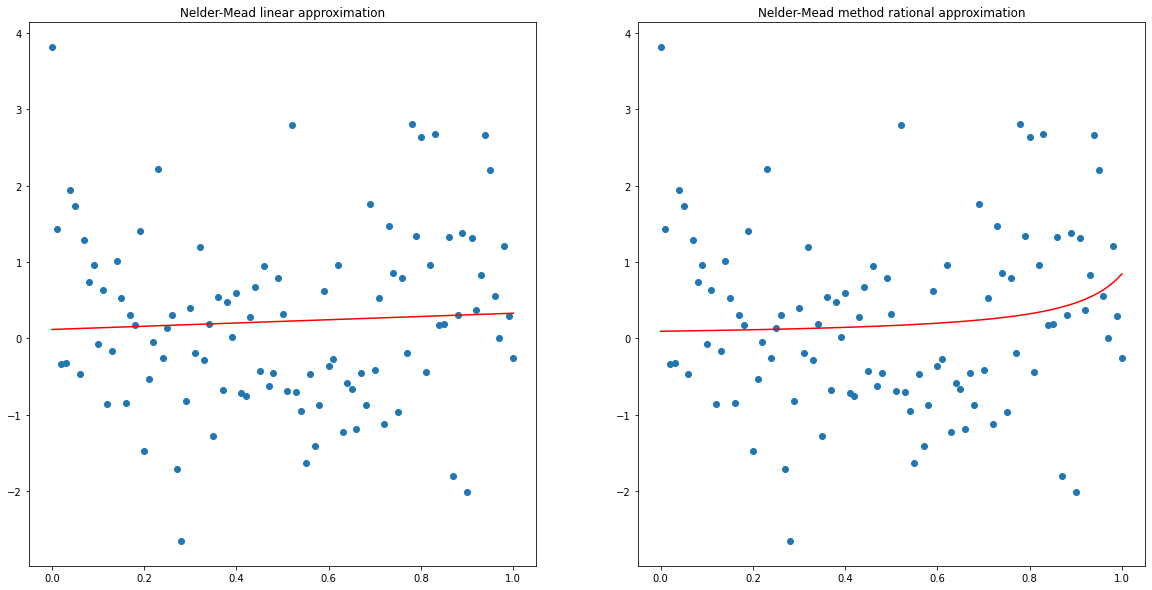

In [31]:
# Nelder-Mead

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes.flat[0].plot(X, F_linear(X, F_linear_opt_3[0], F_linear_opt_3[1]), color = 'red')
axes.flat[0].scatter(X, Y)
axes.flat[0].set_title('Nelder-Mead linear approximation')


axes.flat[1].plot(X, F_rational(X, F_rational_opt_3[0], F_rational_opt_3[1]), color = 'red')
axes.flat[1].scatter(X, Y)
axes.flat[1].set_title('Nelder-Mead method rational approximation')